![wcar](static/wcar.png)
# Over Expression Library: NMT

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

# Analysis start

In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#load labrary
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image

In [3]:
import sys
sys.path.insert(0, "mylib")

In [4]:
from plot_region_coverage import plot_region
from plot_region_coverage import get_field
from plot_region_coverage import gff_to_pandas

In [5]:
#import itables.interactive
from itables import show

<IPython.core.display.Javascript object>

## Helper functions

In [6]:
_EXPERIMENT = '1-Amp'
_FASTQ_HEADER = 'V350002156_L1_TRYlhwR021518-521_'
_GFF = os.path.join('genomes','tb427','tb427.gff')

## Read GFF file

In [7]:
gff = gff_to_pandas(_GFF)
gff.set_index('gene_id',inplace=True)
#print(gff.shape)
gff.head()

                gene_chr    source ftype  gene_start  gene_end score  \
0     Chr1_core_Tb427v10  EuPathDB  gene       33710     34309     .   
4   unitig_1853_Tb427v10  EuPathDB  gene       26627     29008     .   
8    Chr10_core_Tb427v10  EuPathDB  gene     3400699   3401784     .   
12  unitig_2138_Tb427v10  EuPathDB  gene       16903     18203     .   
20     Chr11_3B_Tb427v10  EuPathDB  gene      357090    357953     .   

   gene_strand score2                                          gene_desc  
0            -      .  ID=Tb427_010006200;description=hypothetical pr...  
4            -      .  ID=Tb427_000655200;description=Retrotransposon...  
8            -      .  ID=Tb427_100148100;description=Pentatricopepti...  
12           -      .  ID=Tb427_000717500:pseudogene;description=hypo...  
20           +      .  ID=Tb427_000155800:pseudogene;description=hypo...  


,gene_chr,gene_start,gene_end,gene_strand,gene_desc
gene_id,,,,,
Tb427_010006200,Chr1_core_Tb427v10,33710,34309,-,hypothetical proteinC conserved
Tb427_000655200,unitig_1853_Tb427v10,26627,29008,-,Retrotransposon hot spot proteinC putative
Tb427_100148100,Chr10_core_Tb427v10,3400699,3401784,-,Pentatricopeptide repeat domain containing pro...
Tb427_000717500:pseudogene,unitig_2138_Tb427v10,16903,18203,-,hypothetical proteinC conserved
Tb427_000155800:pseudogene,Chr11_3B_Tb427v10,357090,357953,+,hypothetical proteinC conserved


## Read Peaks

In [8]:
path_to_peaks = os.path.join(_EXPERIMENT,'macs2_'+_FASTQ_HEADER,'NA_peaks.xls')
peaks = pd.read_csv(path_to_peaks, sep='\t', index_col=None, comment='#')
peaks.sort_values('pileup',ascending=False,inplace=True)
peaks.rename({'chr':'region_chr','start':'region_start','end':'region_end',
             'length':'region_length','pileup':'region_pileup',
              'name':'region_name'},axis=1,inplace=True)
peaks.drop(['-log10(pvalue)','fold_enrichment','-log10(qvalue)'],inplace=True,axis=1)
print(peaks.shape)
peaks.head(10)
#filter out small count peaks
peaks = peaks[peaks['region_pileup']>peaks['region_pileup'].mean()]
peaks = peaks.head(20)
print(peaks.shape)

(1, 6)
(0, 6)


## Read Gene Counts

In [9]:
path_to_counts = os.path.join(_EXPERIMENT,'counts.txt')
counts = pd.read_csv(path_to_counts, sep='\t', index_col=None, comment='#')
print(counts.head())
counts.columns = ['gene_id', 'cchr', 'cstart', 'cend', 'cstrand', 'cgenelen',
                  'counts','counts_ff','counts_fr','counts_rf','counts_rr']
counts.set_index('gene_id',inplace=True)
print(counts.shape)
counts.head()

                       Geneid                 Chr  Start    End Strand  \
0             Tb427_010005000  Chr1_core_Tb427v10   1164   3749      -   
1             Tb427_010005100  Chr1_core_Tb427v10   4031   5179      -   
2  Tb427_010005200:pseudogene  Chr1_core_Tb427v10   5303   6147      +   
3             Tb427_010005300  Chr1_core_Tb427v10  11292  12113      -   
4             Tb427_010005400  Chr1_core_Tb427v10  12514  15903      -   

   Length  \
0    2586   
1    1149   
2     845   
3     822   
4    3390   

   /tmp/44370.1.all.q/1-Amp/V350002156_L1_TRYlhwR021518-521_sorted.bam  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   /tmp/44370.1.all.q/1-Amp/V35

,cchr,cstart,cend,cstrand,cgenelen,counts,counts_ff,counts_fr,counts_rf,counts_rr
gene_id,,,,,,,,,,
Tb427_010005000,Chr1_core_Tb427v10,1164,3749,-,2586,0,0,0,0,0
Tb427_010005100,Chr1_core_Tb427v10,4031,5179,-,1149,0,0,0,0,0
Tb427_010005200:pseudogene,Chr1_core_Tb427v10,5303,6147,+,845,0,0,0,0,0
Tb427_010005300,Chr1_core_Tb427v10,11292,12113,-,822,0,0,0,0,0
Tb427_010005400,Chr1_core_Tb427v10,12514,15903,-,3390,0,0,0,0,0


## Merge counts and GFF file

In [10]:
genes = counts.join(gff)
print(genes.shape)
genes.head(10)
genes.reset_index(drop=False,inplace=True)
genes.head()

(17243, 15)


,gene_id,cchr,cstart,cend,cstrand,cgenelen,counts,counts_ff,counts_fr,counts_rf,counts_rr,gene_chr,gene_start,gene_end,gene_strand,gene_desc
0,Tb427_010005000,Chr1_core_Tb427v10,1164,3749,-,2586,0,0,0,0,0,Chr1_core_Tb427v10,1164,3749,-,Reverse transcriptase (RNA-dependent DNA polym...
1,Tb427_010005100,Chr1_core_Tb427v10,4031,5179,-,1149,0,0,0,0,0,Chr1_core_Tb427v10,4031,5179,-,Endonuclease-reverse transcriptaseC putative
2,Tb427_010005200:pseudogene,Chr1_core_Tb427v10,5303,6147,+,845,0,0,0,0,0,Chr1_core_Tb427v10,5303,6147,+,Trypanosome variant surface glycoprotein C-ter...
3,Tb427_010005300,Chr1_core_Tb427v10,11292,12113,-,822,0,0,0,0,0,Chr1_core_Tb427v10,11292,12113,-,hypothetical proteinC conserved
4,Tb427_010005400,Chr1_core_Tb427v10,12514,15903,-,3390,0,0,0,0,0,Chr1_core_Tb427v10,12514,15903,-,RNA polymerase beta subunit/RNA polymerase Rpb...


## Find region of interest

In [11]:
def test(genes, peaks, gene):
    gene_start = genes.loc[gene]['gene_start']
    gene_end = genes.loc[gene]['gene_end']
    gene_chr = genes.loc[gene]['gene_chr']
    temp_res = []
    for peak in peaks.index.values:
        peak_start = peaks.loc[peak]['region_start']
        peak_end = peaks.loc[peak]['region_end']
        peak_chr = peaks.loc[peak]['region_chr'] 
        region_name = peaks.loc[peak]['region_name']
        region_count = peaks.loc[peak]['region_pileup']
        if (gene_chr == peak_chr):
            if (peak_start-2000 <= gene_start <= peak_end+2000) or (peak_start-2000 <= gene_end <= peak_end+2000):
                temp_res.append(region_name)
    if len(temp_res)>0:
        return (gene,';'.join(temp_res))
    else:
        return (gene,'NONE')

In [12]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())
#pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(8)

Number of processors:  56


In [13]:
results = [pool.apply_async(test, args=(genes, peaks, gene)) for gene in genes.index.values]
pool.close()

In [14]:
%%time
results = [n.get() for n in results]

CPU times: user 3min 6s, sys: 1min 40s, total: 4min 46s
Wall time: 5min 7s


In [15]:
#%%time
#results = [n.get() for n in results]

In [16]:
temp = pd.DataFrame()
temp['genes']=[n[0] for n in results]
temp['region_name']=[n[1] for n in results]
temp.set_index('genes',inplace=True)
temp.head()

,region_name
genes,
0,NONE
1,NONE
2,NONE
3,NONE
4,NONE


In [17]:
genes = genes.join(temp)
genes.head()

,gene_id,cchr,cstart,cend,cstrand,cgenelen,counts,counts_ff,counts_fr,counts_rf,counts_rr,gene_chr,gene_start,gene_end,gene_strand,gene_desc,region_name
0,Tb427_010005000,Chr1_core_Tb427v10,1164,3749,-,2586,0,0,0,0,0,Chr1_core_Tb427v10,1164,3749,-,Reverse transcriptase (RNA-dependent DNA polym...,NONE
1,Tb427_010005100,Chr1_core_Tb427v10,4031,5179,-,1149,0,0,0,0,0,Chr1_core_Tb427v10,4031,5179,-,Endonuclease-reverse transcriptaseC putative,NONE
2,Tb427_010005200:pseudogene,Chr1_core_Tb427v10,5303,6147,+,845,0,0,0,0,0,Chr1_core_Tb427v10,5303,6147,+,Trypanosome variant surface glycoprotein C-ter...,NONE
3,Tb427_010005300,Chr1_core_Tb427v10,11292,12113,-,822,0,0,0,0,0,Chr1_core_Tb427v10,11292,12113,-,hypothetical proteinC conserved,NONE
4,Tb427_010005400,Chr1_core_Tb427v10,12514,15903,-,3390,0,0,0,0,0,Chr1_core_Tb427v10,12514,15903,-,RNA polymerase beta subunit/RNA polymerase Rpb...,NONE


## Add region to results

this is the full result table

In [18]:
genes = pd.merge(genes, peaks, right_on='region_name', left_on='region_name', how='left')
print(genes.shape)
#genes.head(10)

(17243, 22)


In [19]:
genes.sort_values(['counts','region_pileup']).dropna().tail(5)

,gene_id,cchr,cstart,cend,cstrand,cgenelen,counts,counts_ff,counts_fr,counts_rf,...,gene_start,gene_end,gene_strand,gene_desc,region_name,region_chr,region_start,region_end,region_length,region_pileup


In [20]:
genes.to_csv(_EXPERIMENT+'/res.csv')

## Plot Genome Coverage

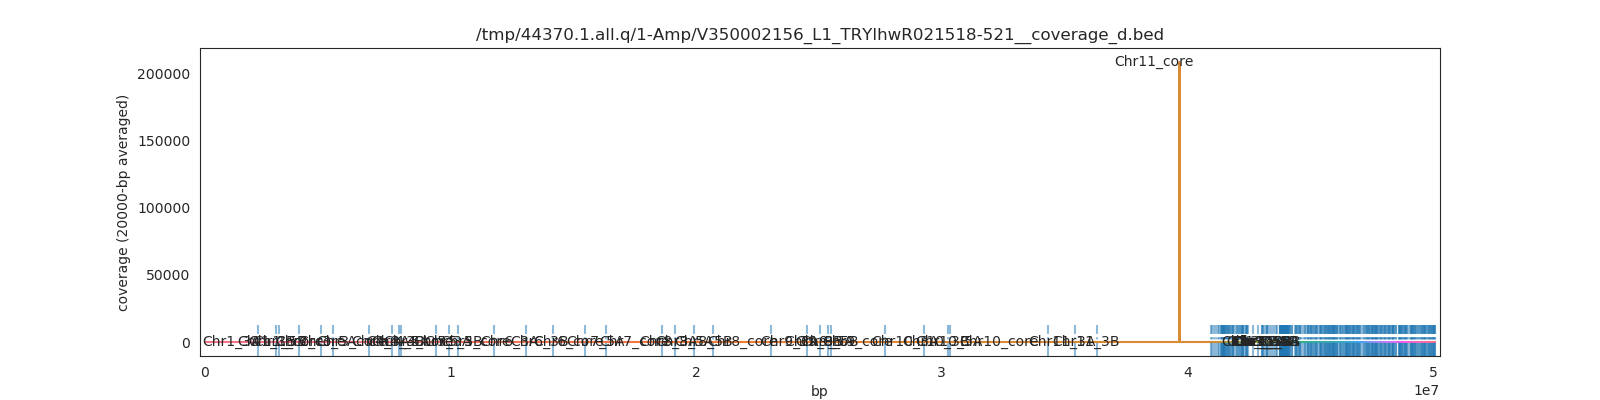

In [21]:
Image(filename=os.path.join(_EXPERIMENT,_FASTQ_HEADER+'coverage_d.png')) 